<a href="https://colab.research.google.com/github/fsilvino/INE5644-data-mining-projeto-final/blob/master/eda/eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Análise exploratória de dados e preparação de dados por Flávio Silvino
import pandas as pd
import numpy as np
import math

In [2]:
# Inicialmente o carregamento havia sido feito mais simples:
# Depois fui incrementando com as descobertas feitas durante a exploração
df = pd.read_csv('../datasets/openDataSUS/INFLUD-21-09-2020.csv', delimiter=';')

d:\github\ine5644-data-mining-projeto-final\venv\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (15,60,62,63,64,92,94,108,117,121,123) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
# número de linhas e colunas
df.shape

(754901, 154)

In [4]:
for i, name in enumerate(df.columns.values):
    if i in (15,60,62,63,64,92,94,108,117,121,123):
        print(str(i) + ' - ' + name + ': ')
        print('dtype: ', df[name].dtype)
        print('Valores: ', end='')
        print(df[name].unique())
        print()

15 - COD_IDADE: 
dtype:  object
Valores: [2008 3021 3080 3020 3004 3059 3067 3068 3054 3005 3024 3029 3019 3053
 3048 3056 3077 3051 3039 3014 3040 3072 3002 3028 3001 2009 3057 3032
 3027 3064 3025 3073 3043 2006 2002 2011 3036 3075 3060 3013 3003 3009
 3079 3017 2001 3052 3094 3050 3034 3031 3006 3038 3045 3083 1027 3049
 3030 3026 3085 3023 3062 3037 3087 3093 3033 3063 3042 3046 3082 3090
 3035 3061 1013 3055 3058 3078 3070 3066 3069 3086 3065 3074 3016 3076
 2003 3018 3041 1002 3071 3044 3081 3084 3047 3015 3091 3088 3008 3089
 1000 3095 1001 3096 3092 3100 3010 3097 3022 3007 2007 3011 3012 3098
 2004 3099 3107 1009 2010 1016 1021 3105 2005 2000 3102 1004 1011 1010
 1007 1028 1005 3103 3101 3104 1003 1015 1012 3138 1006 1026 1014 1025
 1008 3106 1017 3000 1019 1020 3108 3120 3109 3136 1023 1022 1018 1024
 3132 3111 3139 '3062' '3073' '3055' '3021' '3051' '3049' '3036' '3029'
 '3045' '3079' '3063' '3081' '3091' '3075' '3061' '3076' '3074' '3092'
 '3071' '3070' '3053' '3059' '3040'

In [5]:
pd.Series(df['PAC_COCBO'].unique().astype(str)).sort_values(key=lambda x: x.str.lower(), ascending=False).head(5).to_markdown(tablefmt='html')

,0
8,XXX
0,nan
353,992225
842,992210
659,992205


In [6]:
# Verificando quais são as colunas de data para converter para datetime
df.filter(regex='^DT_', axis=1).head(5)

,DT_NOTIFIC,DT_SIN_PRI,DT_NASC,DT_UT_DOSE,DT_VAC_MAE,DT_DOSEUNI,DT_1_DOSE,DT_2_DOSE,DT_ANTIVIR,DT_INTERNA,...,DT_PCR,DT_EVOLUCA,DT_ENCERRA,DT_DIGITA,DT_VGM,DT_RT_VGM,DT_TOMO,DT_RES_AN,DT_CO_SOR,DT_RES
0,08/01/2020,05/01/2020,13/05/2019,NaN,NaN,NaN,NaN,NaN,05/01/2020,05/01/2020,...,13/02/2020,25/01/2020,19/05/2020,09/01/2020,NaN,NaN,NaN,NaN,NaN,NaN
1,28/01/2020,22/01/2020,05/03/1998,NaN,NaN,NaN,NaN,NaN,24/01/2020,24/01/2020,...,04/02/2020,02/02/2020,18/02/2020,28/01/2020,NaN,NaN,NaN,NaN,NaN,NaN
2,13/01/2020,11/01/2020,31/07/1939,NaN,NaN,NaN,NaN,NaN,11/01/2020,11/01/2020,...,24/01/2020,20/01/2020,24/01/2020,24/01/2020,NaN,NaN,NaN,NaN,NaN,NaN
3,18/02/2020,12/02/2020,25/10/1999,NaN,NaN,NaN,NaN,NaN,19/02/2020,12/02/2020,...,NaN,NaN,NaN,21/02/2020,NaN,NaN,NaN,NaN,NaN,NaN
4,19/02/2020,14/02/2020,17/01/2016,NaN,NaN,NaN,NaN,NaN,19/02/2020,18/02/2020,...,04/03/2020,23/02/2020,12/03/2020,21/02/2020,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
# Indentifiquei que:
#    - As colunas que começam com DT_ são do tipo data e estão no formato dd/mm/aaaa
#    - As colunas 'FLUASU_OUT', 'FLUBLI_OUT', 'CLASSI_OUT', 'LO_PS_VGM', 'OUT_ANIM' são do tipo string
#    - A coluna 'PAC_COCBO' possui um valor inválido 'XXX', então estou convertendo para int e os valores inválidos estão setados para NA
#    - A coluna 'COD_IDADE' possui um valor inválido '20-1', então também estou convertendo para int e os valores inválidos setados para NA
#    - Várias colunas utilizam o código 9 para Ignorado, ou seja, não se sabe o valor pois não foi informado (serão tratados como NA)
to_date_parser = lambda x: pd.to_datetime(x, format='%d/%m/%Y', errors='coerce')
to_numeric_parser = lambda x: pd.to_numeric(x, errors='coerce')

# lendo o dataset
df = pd.read_csv('../datasets/openDataSUS/INFLUD-21-09-2020.csv', delimiter=';',
                 date_parser=to_date_parser,
                 parse_dates=['DT_NOTIFIC', 'DT_SIN_PRI', 'DT_NASC', 'DT_UT_DOSE', 'DT_VAC_MAE',
                              'DT_DOSEUNI', 'DT_1_DOSE', 'DT_2_DOSE', 'DT_ANTIVIR', 'DT_INTERNA',
                              'DT_ENTUTI', 'DT_SAIDUTI', 'DT_RAIOX', 'DT_COLETA', 'DT_PCR',
                              'DT_EVOLUCA', 'DT_ENCERRA', 'DT_DIGITA', 'DT_VGM', 'DT_RT_VGM',
                              'DT_TOMO', 'DT_RES_AN', 'DT_CO_SOR', 'DT_RES'],
                 na_values={'CS_SEXO': '9', 'CS_GESTANT': '9', 'CS_RACA': '9', 'CS_ESCOL_N': '9', 'CS_ZONA': '9', 'HISTO_VGM': '9', 'SURTO_SG': '9', 'NOSOCOMIAL': '9', 'AVE_SUINO': '9',
                            'FEBRE': '9', 'TOSSE': '9', 'GARGANTA': '9', 'DISPNEIA': '9', 'DESC_RESP': '9', 'SATURACAO': '9', 'DIARREIA': '9', 'VOMITO': '9', 'DOR_ABD': '9', 'FADIGA': '9',
                            'PERD_OLFT': '9', 'PERD_PALA': '9', 'OUTRO_SIN': '9', 'FATOR_RISC': '9', 'PUERPERA': '9', 'CARDIOPATI': '9', 'HEMATOLOGI': '9', 'SIND_DOWN': '9', 'HEPATICA': '9',
                            'ASMA': '9', 'DIABETES': '9', 'NEUROLOGIC': '9', 'PNEUMOPATI': '9', 'IMUNODEPRE': '9', 'RENAL': '9', 'OBESIDADE': '9', 'OUT_MORBI': '9', 'VACINA': '9',
                            'MAE_VAC': '9', 'M_AMAMENTA': '9', 'ANTIVIRAL': '9', 'HOSPITAL': '9', 'UTI': '9', 'SUPORT_VEN': '9', 'RAIOX_RES': '9', 'TOMO_RES': '9', 'AMOSTRA': '9',
                            'TP_AMOSTRA': '9', 'RES_AN': '9', 'POS_AN_FLU': '9', 'POS_AN_OUT': '9', 'PCR_RESUL': '9', 'POS_PCRFLU': '9', 'POS_PCROUT': '9', 'TP_AM_SOR': '9', 'EVOLUCAO': '9'},
                 converters={'PAC_COCBO': to_numeric_parser, 'COD_IDADE': to_numeric_parser},
                 dtype={'FLUASU_OUT': str, 'FLUBLI_OUT': str, 'CLASSI_OUT': str, 'LO_PS_VGM': str, 'OUT_ANIM': str})

In [8]:
# Calculando percentual de valores faltantes para cada coluna
def calcularFaltantes(dataFrame):
    registros = dataFrame.shape[0]
    return dataFrame.apply(lambda x: sum(x.isnull()) / registros, axis=0)

def listarFaltantes(faltantes, percentual):
    display(faltantes.loc[faltantes > percentual].sort_values(ascending=False).to_markdown(tablefmt="html"))
    
def calcularEListarFaltantes(dataFrame, percentual):
    faltantes = calcularFaltantes(dataFrame)
    listarFaltantes(faltantes, percentual)

In [9]:
# Mostrando o percentual de valores faltantes das colunas com mais de 90% de seus registros em branco
calcularEListarFaltantes(df, 0.9)

,0
AN_PARA2,0.999999
FLUBLI_OUT,0.999997
AN_PARA3,0.999995
FLUASU_OUT,0.999993
AN_PARA1,0.99998
PCR_PARA2,0.999974
PCR_PARA4,0.99997
AN_ADENO,0.999963
PCR_BOCA,0.999958
PCR_PARA1,0.999899


In [10]:
# verificando quantos resultados de teste de COVID-19 estão preenchidos (depois verificou-se que existem mais colunas com este dado)
df['RES_IGM'].count()

51742

In [11]:
df.head()

,DT_NOTIFIC,SEM_NOT,DT_SIN_PRI,SEM_PRI,SG_UF_NOT,ID_REGIONA,CO_REGIONA,ID_MUNICIP,CO_MUN_NOT,ID_UNIDADE,...,DS_AN_OUT,TP_AM_SOR,SOR_OUT,DT_CO_SOR,TP_SOR,OUT_SOR,DT_RES,RES_IGG,RES_IGM,RES_IGA
0,2020-01-08,2,2020-01-05,2,SP,GVE XVII CAMPINAS,1342.0,CAMPINAS,350950,HOSPITAL E MATERNIDADE CELSO PIERRO,...,NaN,NaN,NaN,NaT,NaN,NaN,NaT,NaN,NaN,NaN
1,2020-01-28,5,2020-01-22,4,PR,02RS METROPOLITANA,1356.0,CURITIBA,410690,COMPLEXO HOSPITAL DE CLINICAS,...,NaN,NaN,NaN,NaT,NaN,NaN,NaT,NaN,NaN,NaN
2,2020-01-13,3,2020-01-11,2,PR,16RS APUCARANA,1370.0,JANDAIA DO SUL,411210,CASA DE SAUDE E MAT N SENHORA FATIMA,...,NaN,NaN,NaN,NaT,NaN,NaN,NaT,NaN,NaN,NaN
3,2020-02-18,8,2020-02-12,7,MA,REGI0NAL DE SAUDE METROPOLITANA,1430.0,SAO LUIS,211130,SOCORRAO II,...,NaN,NaN,NaN,NaT,NaN,NaN,NaT,NaN,NaN,NaN
4,2020-02-19,8,2020-02-14,7,PR,15RS MARINGA,1369.0,MARINGA,411520,HOSPITAL MUNICIPAL DE MARINGA THELMA VILLANOVA...,...,NaN,NaN,NaN,NaT,NaN,NaN,NaT,NaN,NaN,NaN


In [12]:
# Verificando o período dos dados
print("min:", df['DT_NOTIFIC'].min())
print("max:", df['DT_NOTIFIC'].max())

min: 2019-12-29 00:00:00
max: 2020-09-21 00:00:00


In [13]:
# Existe um valor estranho (que parece incorreto: 20-1) que impede a conversão para inteiro na coluna COD_IDADE. Poderíamos remover ou tratar este valor,
# porém como não sabemos para que serve este campo e não encontramos ele no dicionário de dados, estamos descartando-o.
# Além disso, outras colunas que, no nosso entendimento, não serão importantes para o objetivo e escopo deste projeto estão sendo descartadas.
# Assim como colunas que possuem mais de 90% de seus registros com valor em branco (faltante) também foram removidas.
df = df.drop(['COD_IDADE', 'SEM_NOT', 'OBES_IMC', 'DT_UT_DOSE', 'MAE_VAC', 'DT_VAC_MAE',
       'M_AMAMENTA', 'DT_DOSEUNI', 'DT_1_DOSE', 'DT_2_DOSE', 'DT_ANTIVIR',
       'DT_RAIOX', 'DT_COLETA', 'DT_PCR', 'POS_PCRFLU', 'TP_FLU_PCR',
       'PCR_FLUASU', 'FLUASU_OUT', 'PCR_FLUBLI', 'FLUBLI_OUT',
       'POS_PCROUT', 'PCR_VSR', 'PCR_PARA1', 'PCR_PARA2', 'PCR_PARA3',
       'PCR_PARA4', 'PCR_ADENO', 'PCR_METAP', 'PCR_BOCA', 'PCR_RINO',
       'PCR_OUTRO', 'DS_PCR_OUT', 'DT_TOMO', 'TP_TES_AN', 'DT_RES_AN',
       'RES_AN', 'POS_AN_FLU', 'TP_FLU_AN', 'POS_AN_OUT', 'AN_VSR',
       'AN_PARA1', 'AN_PARA2', 'AN_PARA3', 'AN_ADENO', 'AN_OUTRO',
       'DS_AN_OUT', 'OUT_ANIM', 'LO_PS_VGM', 'DT_VGM', 'DT_RT_VGM',
       'PAIS_VGM', 'CO_PS_VGM', 'CS_ETINIA', 'OUT_SOR', 'SOR_OUT',
       'OUT_ANTIV', 'TOMO_OUT', 'PAC_COCBO', 'PAC_DSCBO', 'DT_CO_SOR',
       'DT_RES', 'TP_AM_SOR', 'TP_SOR'], axis=1)

In [14]:
df.shape

(754901, 91)

In [15]:
# Filtrando para utilizar apenas dados de pacientes notificados e internados em SC
df = df.loc[(df['SG_UF_NOT'] == 'SC') & (df['SG_UF_NOT'] == df['SG_UF_INTE'])]

In [16]:
# verificando se há dados duplicados
df.duplicated().any()

False

In [17]:
# Verificando se, ao definir FATOR_RISC = 'N', os demais campos relacionados a fatores de risco estarão como Ignorado (verifiquei que sim)
df[['FATOR_RISC', 'CARDIOPATI', 'PUERPERA', 'HEMATOLOGI', 'SIND_DOWN', 'HEPATICA', 'ASMA', 'DIABETES', 'NEUROLOGIC', 'PNEUMOPATI', 'IMUNODEPRE', 'RENAL', 'OBESIDADE', 'OUT_MORBI', 'MORB_DESC']]

,FATOR_RISC,CARDIOPATI,PUERPERA,HEMATOLOGI,SIND_DOWN,HEPATICA,ASMA,DIABETES,NEUROLOGIC,PNEUMOPATI,IMUNODEPRE,RENAL,OBESIDADE,OUT_MORBI,MORB_DESC
6,S,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,NaN
62,S,1.0,2.0,2.0,2.0,2.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,NaN,NaN
65,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100,S,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,HAS
103,S,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,"HAS, ALZHEIMER, DEMENCIA"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
754792,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
754814,S,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,NaN
754853,S,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,NaN
754867,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
# Verificando quantos valores distintos existem para MORB_DESC (verifiquei que são muitos e não daria pra converter para colunas, pois aumentaria muito o número de features)
outrasMorb = pd.Series(df['MORB_DESC'].unique())
print("Qtd: ", outrasMorb.shape[0])
outrasMorb.head(10).to_markdown(tablefmt='html')

Qtd:  1931


,0
0,nan
1,HAS
2,"HAS, ALZHEIMER, DEMENCIA"
3,TABAGISTA
4,HIV
5,HIPOTIREOIDISMO
6,ACAMADA
7,"OBESIDADE, DAC, HIPOTIROIDISMO"
8,HEPATITE C
9,OBESIDADE


In [19]:
# Preencher como 2-Não nos fatores de risco em branco quando FATOR_RISC = 2-Não
def preencherComBaseEmOutraColuna(linha, colunaBase, valorBase, colunasPreencher, valorPreencher):
    if (linha[colunaBase] == valorBase):
        for colunaPreencher in colunasPreencher:
            if (math.isnan(linha[colunaPreencher])):
                linha[colunaPreencher] = valorPreencher
    return linha

df = df.apply(lambda linha: preencherComBaseEmOutraColuna(linha, 'FATOR_RISC', 'N', ['CARDIOPATI', 'PUERPERA', 'HEMATOLOGI', 'SIND_DOWN', 'HEPATICA', 'ASMA', 'DIABETES', 'NEUROLOGIC', 'PNEUMOPATI', 'IMUNODEPRE', 'RENAL', 'OBESIDADE', 'OUT_MORBI'], 2), axis=1)

In [20]:
# Verificando valores dos fatores de risco faltantes
friscos = df[['FATOR_RISC', 'CARDIOPATI', 'PUERPERA', 'HEMATOLOGI', 'SIND_DOWN', 'HEPATICA', 'ASMA', 'DIABETES', 'NEUROLOGIC', 'PNEUMOPATI', 'IMUNODEPRE', 'RENAL', 'OBESIDADE', 'OUT_MORBI']]
friscos[friscos.isna().any(axis=1)]

,FATOR_RISC,CARDIOPATI,PUERPERA,HEMATOLOGI,SIND_DOWN,HEPATICA,ASMA,DIABETES,NEUROLOGIC,PNEUMOPATI,IMUNODEPRE,RENAL,OBESIDADE,OUT_MORBI
62,S,1.0,2.0,2.0,2.0,2.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,NaN
100,S,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
103,S,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
451,S,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
526,S,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
754083,S,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,NaN
754096,S,NaN,2.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
754193,S,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0
754622,S,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0


In [21]:
# como são muitos registros (proporcionalmente ao total de registros disponíveis 3 mil de 17 mil) que estão com NaN, irei considerar que não possui aquele fator de risco que está como Ignorado
df = df.apply(lambda linha: preencherComBaseEmOutraColuna(linha, 'FATOR_RISC', 'S', ['CARDIOPATI', 'PUERPERA', 'HEMATOLOGI', 'SIND_DOWN', 'HEPATICA', 'ASMA', 'DIABETES', 'NEUROLOGIC', 'PNEUMOPATI', 'IMUNODEPRE', 'RENAL', 'OBESIDADE', 'OUT_MORBI'], 2), axis=1)
df[['CARDIOPATI', 'PUERPERA', 'HEMATOLOGI', 'SIND_DOWN', 'HEPATICA', 'ASMA', 'DIABETES', 'NEUROLOGIC', 'PNEUMOPATI', 'IMUNODEPRE', 'RENAL', 'OBESIDADE', 'OUT_MORBI']]

,CARDIOPATI,PUERPERA,HEMATOLOGI,SIND_DOWN,HEPATICA,ASMA,DIABETES,NEUROLOGIC,PNEUMOPATI,IMUNODEPRE,RENAL,OBESIDADE,OUT_MORBI
6,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0
62,1.0,2.0,2.0,2.0,2.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0
65,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
100,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0
103,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
754792,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
754814,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0
754853,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
754867,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0


In [22]:
# confirmando que foi corrigido
friscosCorrigidos = df[['FATOR_RISC', 'CARDIOPATI', 'PUERPERA', 'HEMATOLOGI', 'SIND_DOWN', 'HEPATICA', 'ASMA', 'DIABETES', 'NEUROLOGIC', 'PNEUMOPATI', 'IMUNODEPRE', 'RENAL', 'OBESIDADE', 'OUT_MORBI']]
friscosCorrigidos[friscosCorrigidos.isna().any(axis=1)]

,FATOR_RISC,CARDIOPATI,PUERPERA,HEMATOLOGI,SIND_DOWN,HEPATICA,ASMA,DIABETES,NEUROLOGIC,PNEUMOPATI,IMUNODEPRE,RENAL,OBESIDADE,OUT_MORBI


In [23]:
# verificando percentuais de valores faltantes dos sinais e sintomas
calcularEListarFaltantes(df[['FEBRE', 'TOSSE', 'GARGANTA', 'DISPNEIA', 'DESC_RESP', 'SATURACAO', 'DIARREIA', 'VOMITO', 'DOR_ABD', 'FADIGA', 'PERD_OLFT', 'PERD_PALA']], 0)

,0
DOR_ABD,0.591949
PERD_PALA,0.591482
PERD_OLFT,0.589965
FADIGA,0.583431
GARGANTA,0.140665
VOMITO,0.139498
DIARREIA,0.134481
SATURACAO,0.0854726
DESC_RESP,0.0830222
FEBRE,0.0717036


In [24]:
# Verificando valores dos sinais e sintomas faltantes
sintomas = df[['FEBRE', 'TOSSE', 'GARGANTA', 'DISPNEIA', 'DESC_RESP', 'SATURACAO', 'DIARREIA', 'VOMITO', 'DOR_ABD', 'FADIGA', 'PERD_OLFT', 'PERD_PALA']]
sintomas[sintomas.isna().any(axis=1)]

,FEBRE,TOSSE,GARGANTA,DISPNEIA,DESC_RESP,SATURACAO,DIARREIA,VOMITO,DOR_ABD,FADIGA,PERD_OLFT,PERD_PALA
6,1.0,1.0,2.0,1.0,1.0,1.0,2.0,1.0,NaN,NaN,NaN,NaN
62,1.0,1.0,2.0,1.0,2.0,2.0,2.0,2.0,NaN,NaN,NaN,NaN
65,1.0,1.0,2.0,1.0,1.0,1.0,1.0,2.0,NaN,NaN,NaN,NaN
100,1.0,1.0,2.0,1.0,1.0,1.0,2.0,2.0,NaN,NaN,NaN,NaN
103,2.0,2.0,2.0,1.0,1.0,1.0,2.0,2.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
754507,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,NaN,NaN,NaN,NaN
754609,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,NaN,NaN,NaN,NaN
754622,1.0,1.0,2.0,1.0,1.0,1.0,2.0,2.0,NaN,NaN,NaN,NaN
754867,2.0,1.0,NaN,1.0,1.0,2.0,1.0,1.0,2.0,2.0,2.0,2.0


In [25]:
# como são muitos registros com algum sinal/sintoma faltante, considerei que não possui o sintoma
df.fillna(value={'FEBRE': 2, 'TOSSE': 2, 'GARGANTA': 2, 'DISPNEIA': 2, 'DESC_RESP': 2, 'SATURACAO': 2, 'DIARREIA': 2, 'VOMITO': 2, 'DOR_ABD': 2, 'FADIGA': 2, 'PERD_OLFT': 2, 'PERD_PALA': 2}, inplace=True)

In [26]:
# confirmando o preenchimento
df[['FEBRE', 'TOSSE', 'GARGANTA', 'DISPNEIA', 'DESC_RESP', 'SATURACAO', 'DIARREIA', 'VOMITO', 'DOR_ABD', 'FADIGA', 'PERD_OLFT', 'PERD_PALA']]

,FEBRE,TOSSE,GARGANTA,DISPNEIA,DESC_RESP,SATURACAO,DIARREIA,VOMITO,DOR_ABD,FADIGA,PERD_OLFT,PERD_PALA
6,1.0,1.0,2.0,1.0,1.0,1.0,2.0,1.0,2.0,2.0,2.0,2.0
62,1.0,1.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
65,1.0,1.0,2.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0
100,1.0,1.0,2.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0
103,2.0,2.0,2.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...
754792,2.0,1.0,2.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0
754814,1.0,2.0,2.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0
754853,2.0,1.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
754867,2.0,1.0,2.0,1.0,1.0,2.0,1.0,1.0,2.0,2.0,2.0,2.0


In [27]:
df.head()

,DT_NOTIFIC,DT_SIN_PRI,SEM_PRI,SG_UF_NOT,ID_REGIONA,CO_REGIONA,ID_MUNICIP,CO_MUN_NOT,ID_UNIDADE,CO_UNI_NOT,...,PCR_SARS2,DOR_ABD,FADIGA,PERD_OLFT,PERD_PALA,TOMO_RES,AN_SARS2,RES_IGG,RES_IGM,RES_IGA
6,2020-03-11,2020-03-09,11,SC,BLUMENAU,1564.0,BLUMENAU,420240,HOSPITAL SANTO ANTONIO,2558254,...,NaN,2.0,2.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN
62,2020-03-17,2020-03-17,12,SC,JARAGUA DO SUL,1567.0,JARAGUA DO SUL,420890,HOSPITAL SAO JOSE,2306336,...,NaN,2.0,2.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN
65,2020-03-26,2020-03-22,13,SC,CANOINHAS,1570.0,PORTO UNIAO,421360,HOSPITAL DE CARIDADE SAO BRAZ,2543044,...,NaN,2.0,2.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN
100,2020-03-30,2020-03-27,13,SC,ITAJAI,1550.0,BALNEARIO CAMBORIU,420200,HOSPITAL UNIMED LITORAL,3718395,...,1.0,2.0,2.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN
103,2020-03-31,2020-03-30,14,SC,ITAJAI,1550.0,BALNEARIO CAMBORIU,420200,HOSPITAL UNIMED LITORAL,3718395,...,NaN,2.0,2.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN


In [28]:
# Removi as colunas que não seriam utilizadas ou que possuíam muitos valores faltantes que não valeria a pena excluir os registros do dataset
df = df.drop(['SEM_PRI', 'CO_REGIONA', 'ID_UNIDADE', 'CO_UNI_NOT', 'CO_RG_RESI', 'SURTO_SG', 'NOSOCOMIAL', 'OUTRO_DES', 'MORB_DESC', 'TP_ANTIVIR', 'DT_INTERNA', 'CO_RG_INTE',
             'DT_ENTUTI', 'DT_SAIDUTI', 'RAIOX_OUT', 'AMOSTRA', 'TP_AMOSTRA', 'OUT_AMOST', 'CLASSI_OUT', 'CRITERIO', 'DT_EVOLUCA', 'DT_ENCERRA', 'DT_DIGITA', 'CS_GESTANT', 'DT_NOTIFIC', 'DT_NASC'], axis=1)

In [29]:
# usei este comando para incrementalmente ir removendo as colunas
# df = df.drop(['DT_NASC'], axis=1)

In [30]:
# Considerei a moda 1-Zona Urbana
df.fillna({'CS_ZONA':1}, inplace=True)

# Utilizei a moda 2-Não
df.fillna({'AVE_SUINO': 2}, inplace=True)

# Utilizei a moda 2-Não
df.fillna({'OUTRO_SIN': 2}, inplace=True)

# Utilizei a moda 2-Não
df.fillna({'VACINA': 2}, inplace=True)

# Utilizei a moda 2-Não
df.fillna({'ANTIVIRAL': 2}, inplace=True)

# Utilizei a moda 1-Sim
df.fillna({'HOSPITAL': 1}, inplace=True)

# Utilizei a moda 2-Não
df.fillna({'UTI': 2}, inplace=True)

# Utilizei a moda 2-Não
df.fillna({'SUPORT_VEN': 2}, inplace=True)

# Utilizei a moda 6-Não realizado
df.fillna({'RAIOX_RES': 6}, inplace=True)

# Defini 2-Não, pois geralmente não possui outros dados relacionados também
df.fillna({'AMOSTRA': 2}, inplace=True)

# Utilizei a moda 1-Cura
df.fillna({'EVOLUCAO': 1}, inplace=True)

# Utilizei a moda 2-Não
df.fillna({'HISTO_VGM': 2}, inplace=True)

# Setei para 2-Não pois vazio significa não marcado
df.fillna({'PCR_SARS2': 2}, inplace=True)

# Defini como 6-Não realizado
df.fillna({'TOMO_RES': 6}, inplace=True)

# Setei para 2-Não pois vazio significa não marcado
df.fillna({'AN_SARS2': 2}, inplace=True)

# Usei a moda 1-Branca
df.fillna({'CS_RACA': 1}, inplace=True)

In [31]:
# Utilizei este comando para verificar coluna por coluna os valores nulos e decidir se excluiria a coluna ou preencheria (e com qual valor)
df.loc[df['CS_RACA'].isnull()].shape

(0, 65)

In [32]:
df['CS_RACA'].mode()

0    1.0
dtype: float64

In [33]:
# Usei este comando para ver aos poucos as colunas e tratar os faltantes com os comandos acima
df[df.columns[57:]].head()

,FADIGA,PERD_OLFT,PERD_PALA,TOMO_RES,AN_SARS2,RES_IGG,RES_IGM,RES_IGA
6,2.0,2.0,2.0,6.0,2.0,NaN,NaN,NaN
62,2.0,2.0,2.0,6.0,2.0,NaN,NaN,NaN
65,2.0,2.0,2.0,6.0,2.0,NaN,NaN,NaN
100,2.0,2.0,2.0,6.0,2.0,NaN,NaN,NaN
103,2.0,2.0,2.0,6.0,2.0,NaN,NaN,NaN


In [34]:
df.shape

(17140, 65)

In [35]:
semIgg = df.drop(['RES_IGG', 'RES_IGM', 'RES_IGA'], axis=1)
semIgg[semIgg.isna().any(axis=1)]

,DT_SIN_PRI,SG_UF_NOT,ID_REGIONA,ID_MUNICIP,CO_MUN_NOT,CS_SEXO,NU_IDADE_N,TP_IDADE,CS_RACA,CS_ESCOL_N,...,CLASSI_FIN,EVOLUCAO,HISTO_VGM,PCR_SARS2,DOR_ABD,FADIGA,PERD_OLFT,PERD_PALA,TOMO_RES,AN_SARS2
62,2020-03-17,SC,JARAGUA DO SUL,JARAGUA DO SUL,420890,F,48,3,1.0,NaN,...,4.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,6.0,2.0
65,2020-03-22,SC,CANOINHAS,PORTO UNIAO,421360,M,2,2,1.0,5.0,...,NaN,1.0,2.0,2.0,2.0,2.0,2.0,2.0,6.0,2.0
103,2020-03-30,SC,ITAJAI,BALNEARIO CAMBORIU,420200,F,93,3,1.0,NaN,...,4.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,6.0,2.0
215,2020-03-15,SC,BRACO DO NORTE,BRACO DO NORTE,420280,F,37,3,1.0,NaN,...,5.0,1.0,2.0,1.0,2.0,2.0,2.0,2.0,6.0,2.0
219,2020-03-20,SC,ITAJAI,ITAJAI,420820,M,38,3,1.0,NaN,...,4.0,1.0,0.0,2.0,2.0,2.0,2.0,2.0,6.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
754507,2020-06-06,SC,ITAJAI,BALNEARIO CAMBORIU,420200,F,53,3,1.0,NaN,...,5.0,1.0,2.0,1.0,2.0,2.0,2.0,2.0,6.0,2.0
754622,2020-07-19,SC,FLORIANOPOLIS,FLORIANOPOLIS,420540,M,91,3,1.0,NaN,...,4.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,6.0,2.0
754745,2020-08-07,SC,CHAPECO,CHAPECO,420420,F,57,3,1.0,4.0,...,5.0,1.0,2.0,2.0,2.0,1.0,2.0,2.0,1.0,2.0
754867,2020-09-01,SC,VIDEIRA,CURITIBANOS,420480,M,73,3,1.0,NaN,...,4.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,6.0,2.0


In [36]:
calcularEListarFaltantes(df, 0)

,0
RES_IGA,0.896733
RES_IGG,0.850467
RES_IGM,0.845158
CS_ESCOL_N,0.382555
CLASSI_FIN,0.106243
ID_RG_INTE,0.102625
PCR_RESUL,0.0582847
CO_MU_INTE,0.0320303
ID_MN_INTE,0.0320303
ID_RG_RESI,0.000466744


In [37]:
# Usei este comando para visualizar alguns registros com determinada coluna vazia
df.loc[df['PCR_RESUL'].isna()]

,DT_SIN_PRI,SG_UF_NOT,ID_REGIONA,ID_MUNICIP,CO_MUN_NOT,CS_SEXO,NU_IDADE_N,TP_IDADE,CS_RACA,CS_ESCOL_N,...,PCR_SARS2,DOR_ABD,FADIGA,PERD_OLFT,PERD_PALA,TOMO_RES,AN_SARS2,RES_IGG,RES_IGM,RES_IGA
3004,2020-07-24,SC,SAO MIGUEL DO OESTE,IPORA DO OESTE,420765,F,61,3,1.0,1.0,...,2.0,2.0,1.0,2.0,1.0,6.0,2.0,2.0,1.0,4.0
3365,2020-07-04,SC,JOACABA,JOACABA,420900,M,56,3,1.0,NaN,...,2.0,2.0,1.0,2.0,2.0,6.0,2.0,2.0,1.0,4.0
3468,2020-07-14,SC,JOINVILLE,JOINVILLE,420910,M,76,3,4.0,NaN,...,2.0,2.0,1.0,2.0,2.0,6.0,2.0,2.0,1.0,9.0
3706,2020-08-20,SC,VIDEIRA,FRAIBURGO,420550,F,61,3,1.0,NaN,...,2.0,2.0,1.0,2.0,2.0,6.0,2.0,NaN,NaN,NaN
3860,2020-08-20,SC,SAO MIGUEL DO OESTE,IPORA DO OESTE,420765,M,65,3,1.0,3.0,...,2.0,1.0,1.0,2.0,2.0,6.0,2.0,NaN,NaN,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
754073,2020-07-05,SC,JOACABA,CAMPOS NOVOS,420360,M,25,3,1.0,3.0,...,2.0,2.0,1.0,2.0,2.0,6.0,2.0,2.0,1.0,NaN
754096,2020-08-27,SC,CHAPECO,CHAPECO,420420,F,58,3,1.0,NaN,...,2.0,2.0,2.0,2.0,2.0,6.0,2.0,NaN,NaN,NaN
754745,2020-08-07,SC,CHAPECO,CHAPECO,420420,F,57,3,1.0,4.0,...,2.0,2.0,1.0,2.0,2.0,1.0,2.0,NaN,NaN,NaN
754867,2020-09-01,SC,VIDEIRA,CURITIBANOS,420480,M,73,3,1.0,NaN,...,2.0,2.0,2.0,2.0,2.0,6.0,2.0,2.0,2.0,4.0


In [38]:
# Preenchi com o município de notificação os valores que estavam em branco nos demais (internação e residência)
regionais = df['ID_REGIONA']
df['ID_RG_INTE'] = regionais.where(df['ID_RG_INTE'].isna(), other=df['ID_RG_INTE'])
df['ID_RG_RESI'] = regionais.where(df['ID_RG_RESI'].isna(), other=df['ID_RG_RESI'])

codMunicipios = df['CO_MUN_NOT']
df['CO_MU_INTE'] = codMunicipios.where(df['CO_MU_INTE'].isna(), other=df['CO_MU_INTE'])
df['CO_MUN_RES'] = codMunicipios.where(df['CO_MUN_RES'].isna(), other=df['CO_MUN_RES'])

idsMunicipios = df['ID_MUNICIP']
df['ID_MN_INTE'] = idsMunicipios.where(df['ID_MN_INTE'].isna(), other=df['ID_MN_INTE'])
df['ID_MN_RESI'] = idsMunicipios.where(df['ID_MN_RESI'].isna(), other=df['ID_MN_RESI'])

In [39]:
df.describe()

,CO_MUN_NOT,NU_IDADE_N,TP_IDADE,CS_RACA,CS_ESCOL_N,CO_PAIS,CO_MUN_RES,CS_ZONA,AVE_SUINO,FEBRE,...,PCR_SARS2,DOR_ABD,FADIGA,PERD_OLFT,PERD_PALA,TOMO_RES,AN_SARS2,RES_IGG,RES_IGM,RES_IGA
count,17140.000000,17140.000000,17140.000000,17140.000000,10583.000000,17140.000000,17140.000000,17140.000000,17140.000000,17140.00000,...,17140.000000,17140.000000,17140.000000,17140.000000,17140.000000,17140.000000,17140.000000,2563.000000,2654.000000,1770.000000
mean,420861.272520,56.700817,2.977421,1.172229,2.119626,1.002509,420670.371412,1.092357,1.986348,1.42993,...,1.655484,1.968378,1.883314,1.963302,1.961727,5.128063,1.978588,2.100273,1.830445,3.875141
std,553.124607,21.380889,0.174563,0.654934,1.275007,0.328445,6357.805655,0.342354,0.116548,0.49508,...,0.475224,0.174997,0.321055,0.188024,0.191860,1.834094,0.144757,1.371511,1.179307,1.295600
min,420010.000000,0.000000,1.000000,1.000000,0.000000,1.000000,140010.000000,1.000000,1.000000,1.00000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,420430.000000,44.000000,3.000000,1.000000,1.000000,1.000000,420425.000000,1.000000,2.000000,1.00000,...,1.000000,2.000000,2.000000,2.000000,2.000000,6.000000,2.000000,1.000000,1.000000,4.000000
50%,420820.000000,60.000000,3.000000,1.000000,2.000000,1.000000,420830.000000,1.000000,2.000000,1.00000,...,2.000000,2.000000,2.000000,2.000000,2.000000,6.000000,2.000000,2.000000,1.000000,4.000000
75%,421120.000000,72.000000,3.000000,1.000000,3.000000,1.000000,421200.000000,1.000000,2.000000,2.00000,...,2.000000,2.000000,2.000000,2.000000,2.000000,6.000000,2.000000,2.000000,2.000000,4.000000
max,421970.000000,106.000000,3.000000,5.000000,5.000000,44.000000,520140.000000,3.000000,3.000000,2.00000,...,2.000000,2.000000,2.000000,2.000000,2.000000,6.000000,2.000000,9.000000,9.000000,9.000000


In [40]:
# listando as colunas
pd.Series(df.columns.values).to_markdown(tablefmt="html")

,0
0,DT_SIN_PRI
1,SG_UF_NOT
2,ID_REGIONA
3,ID_MUNICIP
4,CO_MUN_NOT
5,CS_SEXO
6,NU_IDADE_N
7,TP_IDADE
8,CS_RACA
9,CS_ESCOL_N


In [41]:
# Binarização com 0 e 1 ao invés de 1 e 2
df = df.replace(2, {'FEBRE': 0,
               'TOSSE': 0,
               'GARGANTA': 0,
               'DISPNEIA': 0,
               'DESC_RESP': 0,
               'SATURACAO': 0,
               'DIARREIA': 0,
               'VOMITO': 0,
               'DOR_ABD': 0,
               'FADIGA': 0,
               'PERD_OLFT': 0,
               'PERD_PALA': 0,
               'OUTRO_SIN': 0,
               'PUERPERA': 0,
               'CARDIOPATI': 0,
               'HEMATOLOGI': 0,
               'SIND_DOWN': 0,
               'HEPATICA': 0,
               'ASMA': 0,
               'DIABETES': 0,
               'NEUROLOGIC': 0,
               'PNEUMOPATI': 0,
               'IMUNODEPRE': 0,
               'RENAL': 0,
               'OBESIDADE': 0,
               'OUT_MORBI': 0,
               'HISTO_VGM': 0,
               'VACINA': 0,
               'ANTIVIRAL': 0,
               'HOSPITAL': 0,
               'UTI': 0
               }, regex=True)

array([[<AxesSubplot:title={'center':'CLASSI_FIN'}>]], dtype=object)

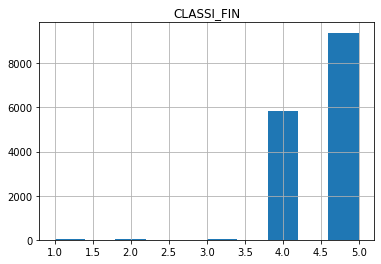

In [42]:
# Aqui buscou-se verificar a quantidade por classificação final do caso
#    1-SRAG por influenza
#    2-SRAG por outro vírus respiratório
#    3-SRAG por outro agente etiológico, qual:
#    4-SRAG não especificado
#    5-SRAG por COVID-19
df[['CLASSI_FIN']].hist()

In [43]:
corr = df[['FEBRE', 'TOSSE', 'GARGANTA', 'DISPNEIA', 'DESC_RESP', 'SATURACAO', 'DIARREIA', 'VOMITO', 'OUTRO_SIN', 'PUERPERA', 'CARDIOPATI', 'HEMATOLOGI', 'SIND_DOWN', 'HEPATICA', 'ASMA', 'DIABETES', 'NEUROLOGIC', 'PNEUMOPATI', 'IMUNODEPRE', 'RENAL', 'OBESIDADE', 'OUT_MORBI', 'DOR_ABD']].corr()
corr

,FEBRE,TOSSE,GARGANTA,DISPNEIA,DESC_RESP,SATURACAO,DIARREIA,VOMITO,OUTRO_SIN,PUERPERA,...,HEPATICA,ASMA,DIABETES,NEUROLOGIC,PNEUMOPATI,IMUNODEPRE,RENAL,OBESIDADE,OUT_MORBI,DOR_ABD
FEBRE,1.000000,0.232186,0.179371,0.003541,0.026853,0.016528,0.093466,0.039014,-0.004840,-0.008665,...,-0.013600,-0.017919,-0.077988,-0.011424,-0.049009,0.013508,-0.044419,0.001021,-0.062853,0.005403
TOSSE,0.232186,1.000000,0.177796,0.112392,0.088352,0.056282,0.045062,-0.006483,-0.019721,-0.006057,...,-0.006493,0.026679,-0.019998,-0.060306,0.018861,-0.007397,-0.051590,0.021438,-0.046661,-0.023785
GARGANTA,0.179371,0.177796,1.000000,0.023609,0.075795,0.021562,0.088370,0.040880,-0.010252,0.011152,...,-0.002489,0.010674,-0.037043,-0.037713,-0.025030,-0.001992,-0.037580,0.008114,-0.051404,0.035575
DISPNEIA,0.003541,0.112392,0.023609,1.000000,0.391609,0.365487,-0.024486,-0.061289,-0.124213,-0.028603,...,-0.007684,0.045534,0.056650,-0.000385,0.079950,0.007131,0.013538,0.065710,0.019867,-0.030889
DESC_RESP,0.026853,0.088352,0.075795,0.391609,1.000000,0.409430,-0.021591,-0.026548,-0.146213,-0.011923,...,0.003336,0.049115,0.027385,0.029940,0.069809,0.008848,0.010864,0.051339,-0.010356,-0.005663
SATURACAO,0.016528,0.056282,0.021562,0.365487,0.409430,1.000000,-0.011822,-0.029836,-0.131553,-0.009141,...,0.014508,0.013669,0.081282,0.057543,0.079543,0.016656,0.028534,0.073948,0.042932,0.001839
DIARREIA,0.093466,0.045062,0.088370,-0.024486,-0.021591,-0.011822,1.000000,0.260799,0.059806,-0.000402,...,0.012910,-0.008998,-0.019680,-0.023071,-0.041946,-0.000542,0.008921,0.023182,-0.010682,0.129150
VOMITO,0.039014,-0.006483,0.040880,-0.061289,-0.026548,-0.029836,0.260799,1.000000,0.063268,0.000976,...,0.019040,0.000006,0.012299,0.001435,-0.017821,-0.000676,0.025006,-0.004657,-0.008082,0.148139
OUTRO_SIN,-0.004840,-0.019721,-0.010252,-0.124213,-0.146213,-0.131553,0.059806,0.063268,1.000000,0.008068,...,-0.006751,-0.020434,-0.017815,-0.028915,-0.046845,-0.002042,-0.013170,0.007005,0.039947,0.005809
PUERPERA,-0.008665,-0.006057,0.011152,-0.028603,-0.011923,-0.009141,-0.000402,0.000976,0.008068,1.000000,...,0.002905,0.010262,-0.016174,0.002143,-0.008031,-0.004689,0.002932,0.007309,-0.016880,-0.005597


In [44]:
# verificando variáveis mais correlacionadas conforme exemplo do professor Francisco Aparecido Rodrigues, francisco@icmc.usp.br.
# disponível em https://github.com/franciscoicmc/ciencia-de-dados/blob/master/Aula1-Preparacao-transformacao.ipynb

p = 0.75 # correlação mínima
var = []
for i in corr.columns:
    for j in corr.columns:
        if(i != j):
            if np.abs(corr[i][j]) > p: # se maior do que |p|
                var.append([i,j])
print('Variáveis mais correlacionadas:\n', var)

Variáveis mais correlacionadas:
 []
